In [11]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train,y_train),(x_test,y_test) = mnist.load_data() # split the that as train and test

# normally, in the multidimentional data values are between 0 and 255 but in the blow we make scaling which makes all the values between 0 and 1
# normalization helps model to learn the data easier
x_train = tf.keras.utils.normalize(x_train,axis = 1) 
x_test = tf.keras.utils.normalize(x_test,axis = 1)

model = tf.keras.models.Sequential() # Feed Forward Model
model.add(tf.keras.layers.Flatten()) # method to add layer
            #Flat Layer makes the multidimentional array into one dimenitonal, makes if flat 28x28 -> 784
            #This is required for the Dense Layer 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
                                #Neuron number, activation is for the selecting activation function, we use relu
            #Dense Layer is fully connected Layer which means every input neuron is connected to output neuron 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) # We added another Dense Layer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # Last layer will be output layer which still is a Dense Layer

model.compile(
    optimizer='adam', # optimization function aims to minimize the loss by updating the weight values
    loss='sparse_categorical_crossentropy', # this function is to calculate the loss
    metrics=['accuracy'] # metric values to show in each epoch
) 
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8658 - loss: 0.4751
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9629 - loss: 0.1170
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9776 - loss: 0.0708


In [12]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.9688 - loss: 0.1023
0.08820593357086182 0.9731000065803528


In [13]:
predictions = model.predict([x_test])

218/313 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_15
Received: inputs=('Tensor(shape=(32, 28, 28))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_15
Received: inputs=('Tensor(shape=(None, 28, 28))',)
  warnings.warn(msg)


In [ ]:
import numpy as np
print(np.argmax(predictions[0])) # prediction[0] is an array includes 10 elements which is between 0 and 1, so each possibility for each numbers. 
# in this case it comes out 7, so the value in the array which has index as 7 has the highest value

7


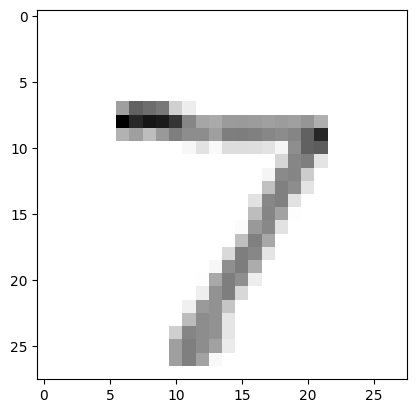

In [15]:
import matplotlib.pyplot as plt
                     #cmap = color map -> to change the colors of the image 
plt.imshow(x_test[0],cmap=plt.cm.binary) # to see the example data (normally its multidimentional array)
                     #cm.binary is for black and white colors
plt.show() # after the normalization the image is gonna be lighter

